# DJEKOUN HOCINE OUASSIM - M1 SID

L'objectif de ce tp est la création d'un modele de classification pour la base MNIST sur le chiffre 5 uniquement. En d'autres termes ce modele pourra nous aider a prédire si X image contient le chiffre 5 ou non.
Voici les differentes étapes par lequelles on va passer



# SOMMAIRE 
### 1. L'importation des librairies 
### 2. Charger la base de données MNIST 
### 3. L'analyse des données
### 4. Transformations sur les données
### 5. Visualisation des données
### 6. Entrainement du modele
### 7. Test de la prédiction


# 1. L'importation des librairies

In [1]:
import numpy as np  
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#Entrainement
from sklearn.model_selection import train_test_split

#Modele
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow import keras

import random


# 2. Charger la base de données MNIST

In [2]:
# La bibliothèque Keras nous offre la BDD MNIST (blanc sur noir)
mnist = keras.datasets.mnist
#On sépare notre base de données en deux partie "test" et "train" pour pouvoir mesurer les performances
#de notre modele sur des données differentes de celles de l'entrainement
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


# 3.L'analyse des données

Un bloc optionel pour avoir une idée des données qu'on a entre les mains

In [3]:
print("Moyenne:", np.mean(x_train))
print("Min:", np.min(x_train))
print("Max:", np.max(x_train))
print("Variance:", np.var(x_train))
print("Taille train:", len(x_train)) 
print("Taille test:", len(x_test)) 

Moyenne: 33.318421449829934
Min: 0
Max: 255
Variance: 6172.850482291342
Taille train: 60000
Taille test: 10000


# 4.Transformations sur les données

Voici toutes les modifications qu'on doit appliquer sur notre base de données pour atteindre l'objectif de ce TP

## 4.1 Diviser les images MNIST

In [4]:
#Comme on l'a remarqué dans la partie "Analyse des données" la valeur minimum de chaque cellule est 0 et la valeur maximal est 255. Ce n'est rien d'autre que le code de couleur de chaque pixel 255 etant blanc et 0 totalement noir 
#on souhaite prend le gris comme reference , chaque pixel dépassant la couleur gris est concidéré blanche, autrement elle est considéré noir.
x_train[x_train < 127] = 1
x_train[x_train >= 127] = 0

x_test[x_test < 127] = 1
x_test[x_test >= 127] = 0


#Puis, on définit une fonction qui divise par 4 la matrice representant chaque image
def premiere_division(image):
    hauteur, largeur = image.shape
    
    diviseur = largeur // 2
    coin_haut_droit = image[:diviseur, :diviseur] 
    coin_haut_gauche = image[:diviseur, diviseur:] 
    coin_bas_droit = image[diviseur:, :diviseur] 
    coin_bas_gauche = image[diviseur:, diviseur:]

    return coin_haut_droit, coin_haut_gauche, coin_bas_droit, coin_bas_gauche


#La dimension voulue étant toujours pas atteinte, on redéfinit une autre fonction qui s'occupera de la deuxieme division par 4
def deuxieme_division(image):
    coin_haut_droit, coin_haut_gauche, coin_bas_droit, coin_bas_gauche = premiere_division(image)
    nouvelle_image = premiere_division(coin_haut_droit), premiere_division(coin_haut_gauche), premiere_division(coin_bas_droit), premiere_division(coin_bas_gauche)
    nouvelle_image = np.asarray(nouvelle_image)
    nouvelle_image = nouvelle_image.reshape(16, 7, 7)
    return nouvelle_image

#A ce stade, nous avons atteint le découpage que l'on souhaitait appliquer, qui est que chaque image est sous forme de 16 matrices, chacune étant de dimension 7x7

## 4.2 Calcul du pourcentage de noir

On calcule le pourcentage de pixels noirs dans la sous-image de notre "nouvelle_image" en divisant le nombre de pixels noirs par 49 (nombre total de pixels dans chaque sous-image) et en multipliant par 100.

In [5]:
def mnist_pourcentage(m):
    nouvelle_mnist = []
    for img in m:
        image = deuxieme_division(img)
        image_pourcentage = []
        for i in range(16):
            noirs = 0
            for j in range(7):
                for k in range(7):
                    if(image[i][j][k] == 0):
                        noirs += 1
            image_pourcentage.append((noirs / 49) * 100)
        nouvelle_mnist.append(image_pourcentage)
    return nouvelle_mnist



# Maintenant on applique cette fonction sur notre split_test_train dont on aura besoin pour entrainer notre modele et tester sa précision
new_x_train = mnist_pourcentage(x_train)
new_x_test = mnist_pourcentage(x_test)
new_x_train = np.array(new_x_train)
new_x_test = np.array(new_x_test)

# 5.Visualisation des données

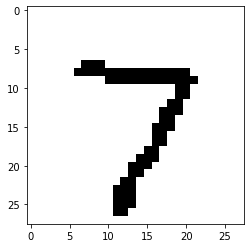

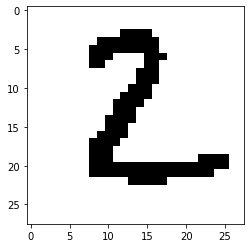

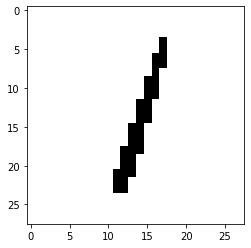

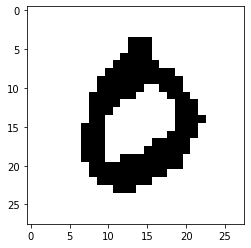

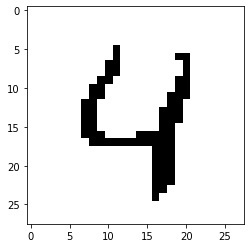

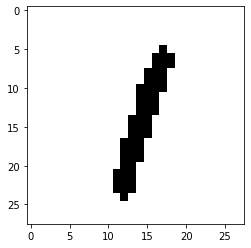

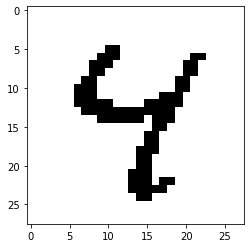

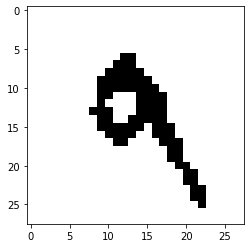

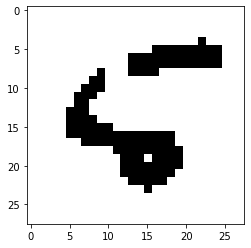

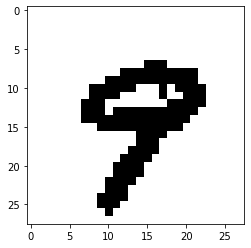

In [6]:
#Une visualsation basique des données sur lequels on a travaillé pour que vous puissiez avoir un apperçu des modifications
for i in range(10):
    plt.imshow(x_test[i], cmap='gray')
    plt.show()

# 6. Entrainement du modele

Le modele qu'on va utiliser est bien évidemment un reseau de neuronnes qui va prendre comme entrées les differents pourcentages de noir dans les 16 matrices representant chaque image de la base de données (16 entrées) et une seule sortie vu que notre classification et binaire ( elle va s'effectuer sur un seul numéro qui est le 5 )

In [7]:
# on limite la valeur à predire de notre training set et testing set à une seule (qui est 5)
y_train_5= (y_train == 5) 
y_test_5= (y_test == 5)

In [8]:
# Construction du modele
#"Flatten" nous permet de redimensionner la matrice en un vecteur (16,)
model = keras.Sequential([
    keras.layers.Dense(32, input_shape=(16,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compilation de modele
model.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['accuracy'])


# Entrainement du modele
model.fit(new_x_train, y_train_5, epochs=5)


2023-01-11 22:51:43.037408: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-01-11 22:51:43.206060: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4340 - accuracy: 0.9185
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1185 - accuracy: 0.9556
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1081 - accuracy: 0.9603
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1030 - accuracy: 0.9627
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0995 - accuracy: 0.9637


# 7.Test de la prédiction

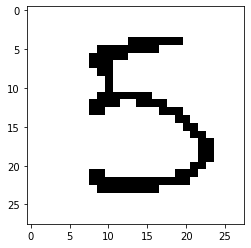

cette image contient le numéro 5
5


In [9]:
#Aprés une petite recherche on trouve que le 24 eme element de notre testing test est un 5(on peut le verifier grace a son libellé qui s'affiche en bas)
#on test notre modele sur cette image
prediction = model.predict(new_x_test)
prediction[15]
plt.imshow(x_test[15], cmap='gray')
plt.show()
if (prediction[15]> 0.5):
     print("cette image contient le numéro 5")
else:
     print("cette image ne contient pas le numéro 5")
print(y_test[15])